# House prices Time Forecasting

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib

## Reading data

In [7]:
raw_sales = pd.read_csv('Data\house_sales.csv')
raw_sales.head()

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3


## Creating all date features

In [8]:
raw_sales.bedrooms.value_counts()

3    11933
4    10442
2     3598
5     1950
1     1627
0       30
Name: bedrooms, dtype: int64

In [9]:
raw_sales = raw_sales.loc[raw_sales['bedrooms'] != 0]
raw_sales['datesold'] = pd.to_datetime(raw_sales['datesold'])
raw_sales['week'] = raw_sales['datesold'].dt.isocalendar().week
raw_sales['week_day'] = raw_sales['datesold'].dt.weekday
raw_sales['month'] = raw_sales['datesold'].dt.month
raw_sales['season'] = (raw_sales['datesold'].dt.month - 1)//3
raw_sales['year'] = raw_sales['datesold'].dt.year
raw_sales['propertyType']=raw_sales['propertyType'].replace(['house', 'unit'], [0,1])
raw_sales.head()

,datesold,postcode,price,propertyType,bedrooms,week,week_day,month,season,year
0,2007-02-07,2607,525000,0,4,6,2,2,0,2007
1,2007-02-27,2906,290000,0,3,9,1,2,0,2007
2,2007-03-07,2905,328000,0,3,10,2,3,0,2007
3,2007-03-09,2905,380000,0,4,10,4,3,0,2007
4,2007-03-21,2906,310000,0,3,12,2,3,0,2007


## Looking at price distribution and applying logaritmic transformation to it

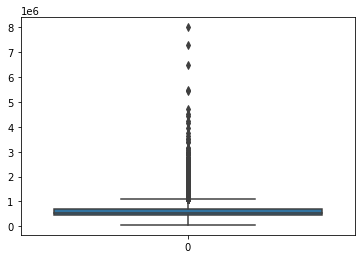

In [10]:
ax = sns.boxplot(raw_sales['price']);

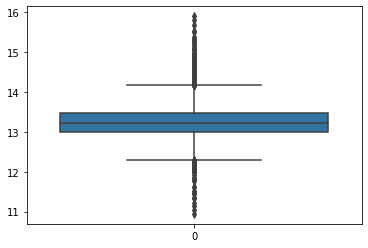

In [11]:
raw_sales['price_trans'] = np.log(raw_sales['price'])

ax = sns.boxplot(raw_sales['price_trans']);

### Exploratory data Analysis

In [13]:
raw_sales.describe()

,postcode,price,propertyType,bedrooms,week,week_day,month,season,year,price_trans
count,29550.000000,2.955000e+04,29550.000000,29550.000000,29550.0,29550.000000,29550.000000,29550.000000,29550.000000,29550.000000
mean,2730.323621,6.098047e+05,0.169780,3.253469,27.485076,2.612047,6.715025,1.558308,2014.624907,13.244892
std,146.729215,2.817045e+05,0.375446,0.946101,14.683864,1.709251,3.379598,1.120435,2.964912,0.374879
min,2600.000000,5.650000e+04,0.000000,1.000000,1.0,0.000000,1.000000,0.000000,2007.000000,10.941996
25%,2607.000000,4.400000e+05,0.000000,3.000000,14.0,1.000000,4.000000,1.000000,2013.000000,12.994530
50%,2615.000000,5.500000e+05,0.000000,3.000000,27.0,3.000000,7.000000,2.000000,2015.000000,13.217674
75%,2905.000000,7.050000e+05,0.000000,4.000000,41.0,4.000000,10.000000,3.000000,2017.000000,13.465953
max,2914.000000,8.000000e+06,1.000000,5.000000,53.0,6.000000,12.000000,3.000000,2019.000000,15.894952


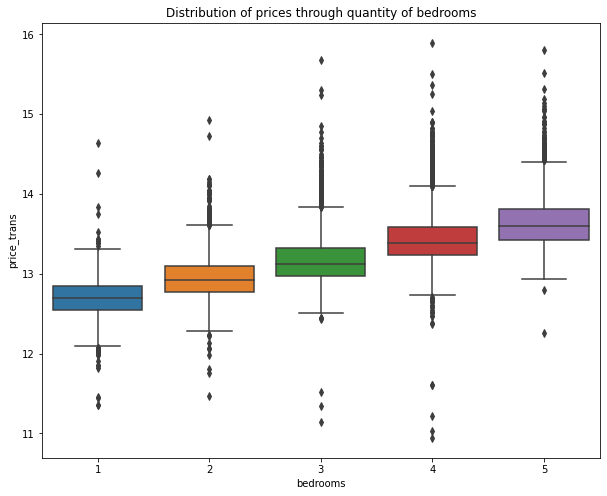

In [21]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'bedrooms', y = 'price_trans', data = raw_sales)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\395435257.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_mean = raw_sales.groupby('year').mean().reset_index()


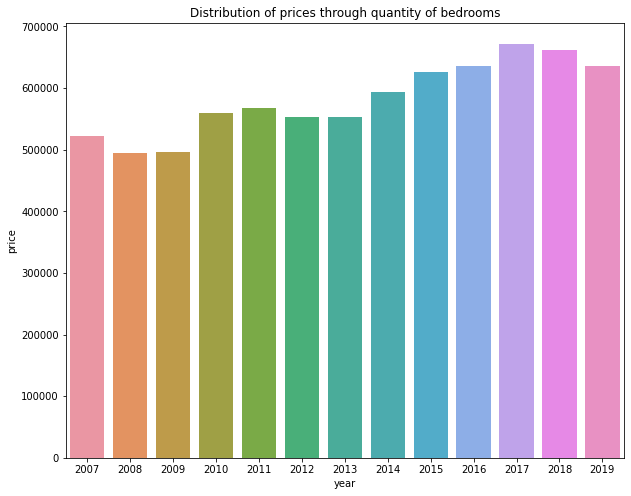

In [43]:
plt.figure(figsize=(10,8))
year_mean = raw_sales.groupby('year').mean().reset_index()
ax = sns.barplot(x = 'year', y = 'price', data = year_mean)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\1312415078.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  month_mean = raw_sales.groupby('month').mean().reset_index()


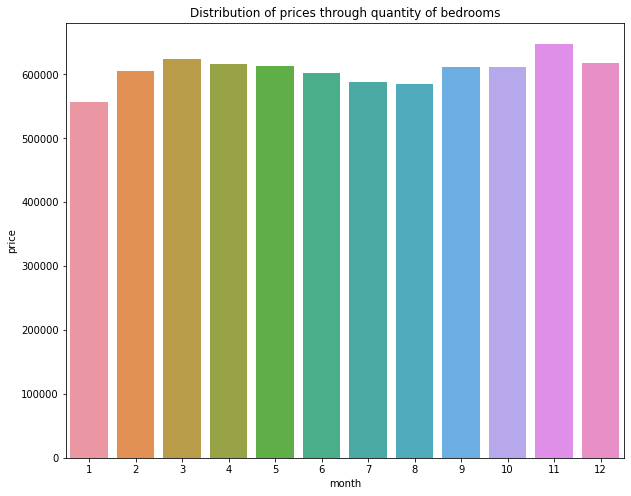

In [41]:
plt.figure(figsize=(10,8))
month_mean = raw_sales.groupby('month').mean().reset_index()
ax = sns.barplot(x = 'month', y = 'price', data = month_mean)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\2463895743.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_mean = raw_sales.groupby('week').mean().reset_index()


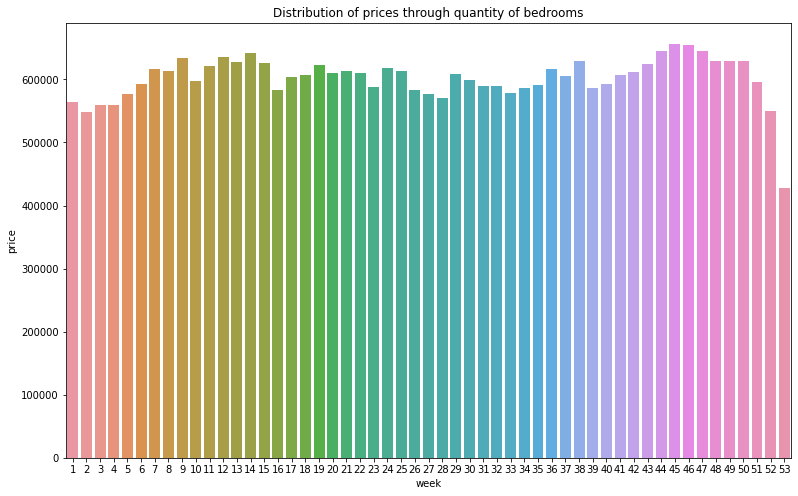

In [39]:
plt.figure(figsize=(13,8))
week_mean = raw_sales.groupby('week').mean().reset_index()
ax = sns.barplot(x = 'week', y = 'price', data = week_mean)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\1697468250.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  week_day_mean = raw_sales.groupby('week_day').mean().reset_index()


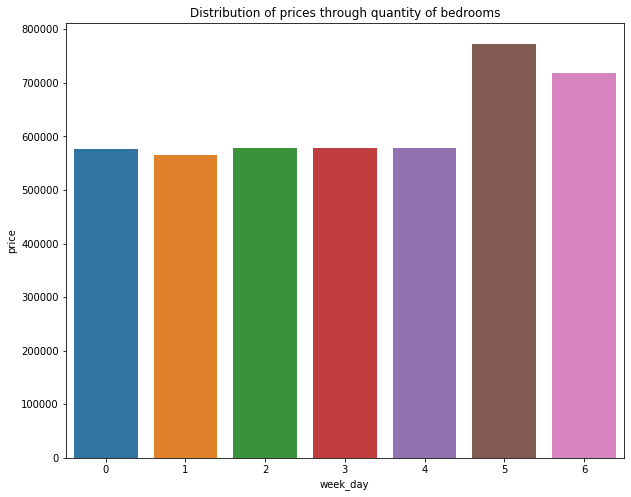

In [46]:
plt.figure(figsize=(10,8))
week_day_mean = raw_sales.groupby('week_day').mean().reset_index()
ax = sns.barplot(x = 'week_day', y = 'price', data = week_day_mean)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\2512939209.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  season_mean = raw_sales.groupby('season').mean().reset_index()


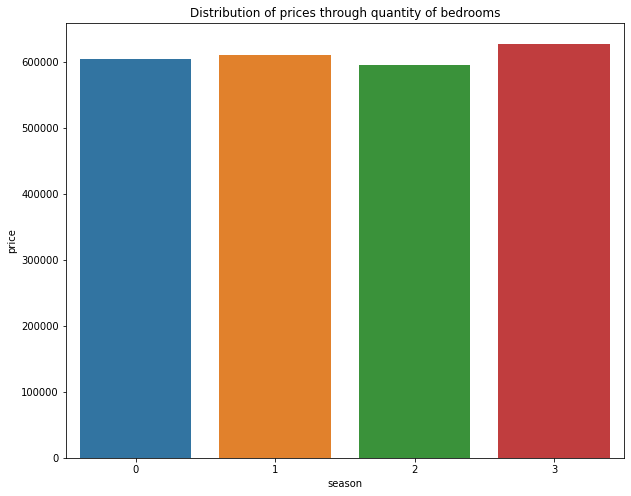

In [48]:
plt.figure(figsize=(10,8))
season_mean = raw_sales.groupby('season').mean().reset_index()
ax = sns.barplot(x = 'season', y = 'price', data = season_mean)
ax.set_title('Distribution of prices through quantity of bedrooms');

C:\Users\bitun\AppData\Local\Temp\ipykernel_16000\2047153611.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.barplot(x = 'price_trans', y= 'index' , data = raw_sales.corr()['price_trans'].reset_index().sort_values(ascending=False, by = 'price_trans'))


<AxesSubplot: xlabel='price_trans', ylabel='index'>

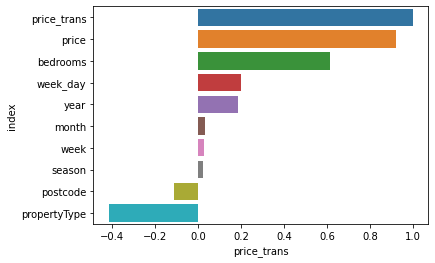

In [54]:
sns.barplot(x = 'price_trans', y= 'index' , data = raw_sales.corr()['price_trans'].reset_index().sort_values(ascending=False, by = 'price_trans'))

## Separing data in training and testing data

In [72]:
raw_sales.sort_values('datesold', ascending = True, inplace = True)
raw_sales.week = raw_sales.week.astype('int')
raw_sales.set_index('datesold', inplace = True)
last_value = int(len(raw_sales) * 0.8)

train_x = raw_sales.iloc[0:last_value].drop(['price', 'price_trans'], axis = 1)
train_y = raw_sales.iloc[0:last_value]['price_trans']
test_x = raw_sales.iloc[last_value:].drop(['price', 'price_trans'], axis = 1)
test_y = raw_sales.iloc[last_value:]['price_trans']

## Creating the model and training

In [73]:
train_x.dtypes

postcode        int64
propertyType    int64
bedrooms        int64
week            int32
week_day        int64
month           int64
season          int64
year            int64
dtype: object

In [78]:
from xgboost import XGBRegressor

#params = {'learning_rate': 0.17487160702725146, 'loss': 'absolute_error', 'max_depth': 5, 'min_impurity_decrease': 0.9282174709047137, 'min_samples_leaf': 65, 
#          'min_samples_split': 33, 'n_estimators': 50, 'subsample': 0.7067241710796682}

rfr = XGBRegressor(n_estimators=15000,
                       early_stopping_rounds=50,
                       learning_rate=0.01)
rfr.fit(train_x, train_y,
        eval_set=[(train_x, train_y), (test_x, test_y)],
        verbose=100)

y_pred = rfr.predict(test_x)

[0]	validation_0-rmse:12.60541	validation_1-rmse:12.69437
[100]	validation_0-rmse:4.62074	validation_1-rmse:4.72834
[200]	validation_0-rmse:1.70388	validation_1-rmse:1.78849
[300]	validation_0-rmse:0.65053	validation_1-rmse:0.71130
[400]	validation_0-rmse:0.29505	validation_1-rmse:0.33777
[500]	validation_0-rmse:0.20050	validation_1-rmse:0.22949
[600]	validation_0-rmse:0.18156	validation_1-rmse:0.20278
[700]	validation_0-rmse:0.17705	validation_1-rmse:0.19584
[800]	validation_0-rmse:0.17513	validation_1-rmse:0.19363
[900]	validation_0-rmse:0.17377	validation_1-rmse:0.19276
[1000]	validation_0-rmse:0.17254	validation_1-rmse:0.19250
[1100]	validation_0-rmse:0.17148	validation_1-rmse:0.19241
[1121]	validation_0-rmse:0.17129	validation_1-rmse:0.19242


In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

mse = mean_squared_error(test_y, y_pred)
mape = mean_absolute_percentage_error(test_y, y_pred)
r2 = rfr.score(test_x, test_y)

print("R²: %.2f" % r2)
print("MSE: %.2f" % mse)
print("RMSE: %.2f" % (mse**(1/2.0)))
print("MAPE: %.2f" % (mape * 100) + '%')

R²: 0.78
MSE: 0.04
RMSE: 0.19
MAPE: 1.03%


## Evaluating the model

In [75]:
test = raw_sales.iloc[last_value:].copy()
test['predictions'] = rfr.predict(test_x)
test['price_prediction'] = np.exp(test['predictions'])
test['error'] = abs(test['price'] - test['price_prediction'])
test['%err'] = abs((test['price_prediction'] / test['price']) - 1)
test.head()

,postcode,price,propertyType,bedrooms,week,week_day,month,season,year,price_trans,predictions,price_prediction,error,%err
datesold,,,,,,,,,,,,,,
2017-11-15,2615,730000,0,4,46,2,11,3,2017,13.500800,13.419314,672874.6875,57125.3125,0.078254
2017-11-15,2602,815000,0,3,46,2,11,3,2017,13.610943,13.570416,782630.8125,32369.1875,0.039717
2017-11-15,2611,710000,0,3,46,2,11,3,2017,13.473020,13.352667,629491.0000,80509.0000,0.113393
2017-11-15,2902,540000,0,3,46,2,11,3,2017,13.199324,13.175385,527226.0000,12774.0000,0.023656
2017-11-16,2615,600000,0,4,46,3,11,3,2017,13.304685,13.435431,683806.7500,83806.7500,0.139678


In [196]:
test['%err'].mean()

0.11211991981875283

In [80]:
test.groupby('bedrooms').mean()['%err'].reset_index()

,bedrooms,%err
0,1,0.136119
1,2,0.154749
2,3,0.123712
3,4,0.142706
4,5,0.157480


<AxesSubplot: xlabel='datesold', ylabel='price'>

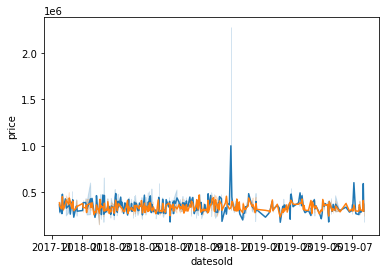

In [81]:
sns.lineplot(x = 'datesold', y = 'price', data = test.loc[test['bedrooms'] == 1])
sns.lineplot(x = 'datesold', y = 'price_prediction', data = test.loc[test['bedrooms'] == 1])
#plt.legend(['Real', 'Predicted'])

<AxesSubplot: xlabel='%err', ylabel='price'>

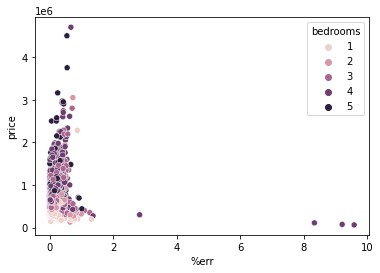

In [82]:
sns.scatterplot(x = '%err', y = 'price', data = test, hue = 'bedrooms')

## Hiperparameter tuning

In [83]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt

In [84]:
parameters = {
        'loss': ['squared_error', 'absolute_error'],
        'learning_rate': sp_randFloat(),
        'subsample'    : sp_randFloat(),
        'n_estimators' : sp_randInt(100, 1000),
        'max_depth'    : sp_randInt(4, 10),
        "n_estimators":[5,50,250,500],
        'min_impurity_decrease': sp_randFloat(),
        'min_samples_leaf': sp_randInt(5,100),
        'min_samples_split': sp_randInt(5,100)
}

In [85]:
randm_src = RandomizedSearchCV(estimator=rfr, param_distributions = parameters,
                               cv = 2, n_iter = 10, n_jobs=-1)
randm_src.fit(train_x, train_y)

print(" Results from Random Search " )
print("\n The best estimator across ALL searched params:\n", randm_src.best_estimator_)
print("\n The best score across ALL searched params:\n", randm_src.best_score_)
print("\n The best parameters across ALL searched params:\n", randm_src.best_params_)

ValueError: 
All the 20 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Anaconda\envs\teste\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\sklearn.py", line 1025, in fit
    self._Booster = train(
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\core.py", line 620, in inner_f
    return func(**kwargs)
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\training.py", line 186, in train
    if cb_container.after_iteration(bst, i, dtrain, evals):
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\callback.py", line 247, in after_iteration
    ret = any(c.after_iteration(model, epoch, self.history)
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\callback.py", line 247, in <genexpr>
    ret = any(c.after_iteration(model, epoch, self.history)
  File "d:\Anaconda\envs\teste\lib\site-packages\xgboost\callback.py", line 412, in after_iteration
    assert len(evals_log.keys()) >= 1, msg
AssertionError: Must have at least 1 validation dataset for early stopping.


In [203]:
randm_src.best_estimator_.score(test_x, test_y)

0.6570856852128106

## Making point-wise predictions

In [204]:
test_x.iloc[-2]

postcode               2615.0
propertyType              0.0
bedrooms                  4.0
week                     30.0
week_day                  5.0
month                     7.0
season                    2.0
year                   2019.0
seasonal          -140.327806
trend           538166.666667
Name: 2019-07-27 00:00:00, dtype: Float64

In [205]:
np.exp(test_y.iloc[-1])

865000.0000000002

In [206]:
np.exp(rfr.predict(np.array([[2905,0,5,30,5,7,2,2019,-140.32,538166.67]])))

d:\Anaconda\envs\teste\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


array([645049.03894348])

## LSTM

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error

In [24]:
raw_sales.columns

Index(['postcode', 'price', 'propertyType', 'bedrooms', 'week', 'week_day',
       'month', 'season', 'year', 'price_trans', 'seasonal', 'trend'],
      dtype='object')

In [40]:
time_steps = 1
n_features = 10

x = raw_sales.drop(['price', 'price_trans'], axis = 1)
y = raw_sales['price_trans']

x = x.reset_index().drop('datesold', axis = 1)

# reshape the data
num_samples = len(x)# - time_steps
data = np.array(x)
data = data.reshape((num_samples, n_features))

last_training_point = int(len(x) * 0.97)
x_train = x[:last_training_point]
y_train = y[:last_training_point]
x_test = x[last_training_point:]
y_test = y[last_training_point:]
# define the model
model = Sequential()
model.add(LSTM(10, input_shape=(time_steps, n_features)))
model.add(Dense(1))

# compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [42]:
model.fit(x_train, y_train)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type int).

In [19]:
X_train = tf.convert_to_tensor(train_x, dtype=tf.float32)
y_train = tf.convert_to_tensor(train_y, dtype=tf.float32)
X_test = tf.convert_to_tensor(test_x, dtype=tf.float32)
y_test = tf.convert_to_tensor(test_y, dtype=tf.float32)

In [ ]:
X_train